In [137]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [138]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [139]:
#converting the catagorical value to numeric 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df[['Gender']])
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


Text(0, 0.5, 'Weight')

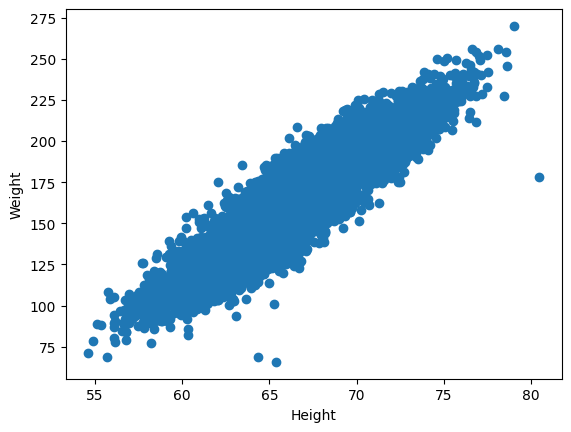

In [140]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [141]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

Linear Regression 

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
L_reg = LinearRegression()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [144]:
L_reg.fit(X_train,y_train)

LinearRegression()

In [145]:
y_predict = L_reg.predict(X_test)
y_predict

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

cost function MSE & MAE

In [146]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [147]:
Mse_linear = mean_absolute_error(y_test,y_predict)
print('Mean squread error  is :',Mse_linear)

Mean squread error  is : 7.870097130738321


In [148]:
Mae_linear = mean_squared_error(y_test,y_predict)
print('Mean absulute error is :',Mae_linear)

Mean absulute error is : 96.83734437830613


R SCORED 

In [149]:
L_reg.score(X_test,y_test)

0.9059112424422658

In [150]:
L_reg.score(X_train,y_train)

0.8973793060969246

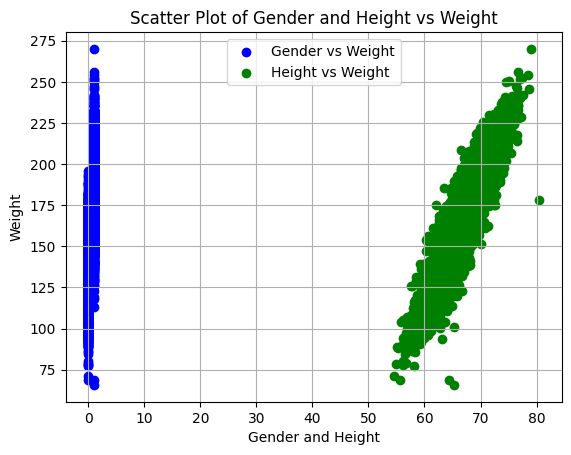

In [151]:
plt.scatter(X_train['Gender'], y_train, color='blue', label='Gender vs Weight')

plt.scatter(X_train['Height'], y_train, color='green', label='Height vs Weight')
plt.xlabel('Gender and Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Gender and Height vs Weight')
plt.legend()
plt.grid(True)
plt.show()

<h3>Applying K- Nearest neghibours KNN</h3>

In [152]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


In [153]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=2)
knn_reg

KNeighborsRegressor(n_neighbors=2)

In [154]:
#train size = 70% and test size = 30%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=36)

In [155]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [156]:
y_predict = knn_reg.predict(X_test)
y_predict

array([131.5585011 , 167.335733  , 188.3459072 , ..., 195.10724615,
       210.1042808 , 112.45834765])

<h1>Cost function MSE and MAE for KNN</h1>

In [157]:
mae_knn = mean_absolute_error(y_test,y_predict)
mae_knn

10.003108532695755

In [158]:
mse_knn = mean_squared_error(y_test,y_predict)
mse_knn

160.20373543391085

<h1>R2 for KNN<h1>

In [159]:
knn_reg.score(X_train,y_train)

0.9500133626775331

<h1>Comparing knn and Linear Reg</h1>

In [160]:
y_predict = L_reg.predict(X_test)
print('Linear regg prediction',y_predict)
y_predict = knn_reg.predict(X_test)
print('KNN prediction :',y_predict)


Linear regg prediction [133.97133712 159.66243303 188.83364595 ... 192.90585309 204.92677704
 131.85715317]
KNN prediction : [131.5585011  167.335733   188.3459072  ... 195.10724615 210.1042808
 112.45834765]


In [161]:
knn_reg.fit(X_train,y_train),
L_reg.fit(X_train,y_train)

LinearRegression()

In [162]:
y_pred = knn_reg.predict(X_test)
mse_KNN = mean_squared_error(y_test, y_pred)
print("Testing MSE for KNN:", mse_KNN)
y_pred = L_reg.predict(X_test)
mse_Linear = mean_squared_error(y_test, y_pred)
print("Testing MSE for Linear regression:", mse_Linear)

Testing MSE for KNN: 160.20373543391085
Testing MSE for Linear regression: 102.80163434764238


<h1>So we can say linear reg perform better </h1>

knn classification

In [163]:
df1 = pd.read_csv('weight-height.csv')
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [164]:
X = df1.iloc[:,1:3] ### Independent variables
y = df1.iloc[:,0] ### dependent variables

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [166]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5,p=2)
KNN_classifier

KNeighborsClassifier()

In [167]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 30)

In [168]:
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [169]:
y_prediction = KNN_classifier.predict(X_test)
y_prediction

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [170]:
from sklearn.metrics import accuracy_score

y_prediction = KNN_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9988313206077133
